In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
%matplotlib inline

In [3]:
winlistDF = pd.read_csv("winequality-red.csv", sep=";")
winlistDF['pOH'] = 14 - winlistDF["pH"]
winlistDF = winlistDF.drop(labels=['pH'], axis=1)

winlistDF.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality,pOH
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,5,10.49
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,0.68,9.8,5,10.80


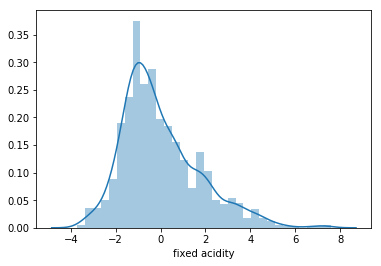

In [4]:
sns.distplot(winlistDF["fixed acidity"]-winlistDF["fixed acidity"].mean())

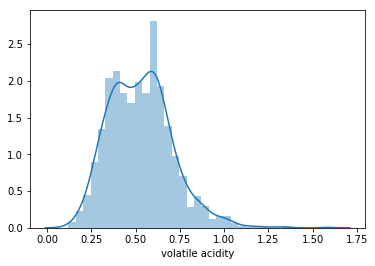

In [5]:
sns.distplot(winlistDF["volatile acidity"])

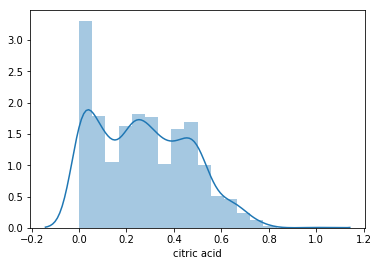

In [6]:
sns.distplot(winlistDF["citric acid"])

In [7]:
WinVar = pd.DataFrame.var(winlistDF)
WinVar

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
pOH                        0.023835
dtype: float64

## Exploring the data: Univariate

1. There are 12 variables
2. 1599 rows of data in each of the 12 columns
3. All of them are continues, except for quality which can only take the interger value of 1 to 10.
4. above
5. No missing data
6. above


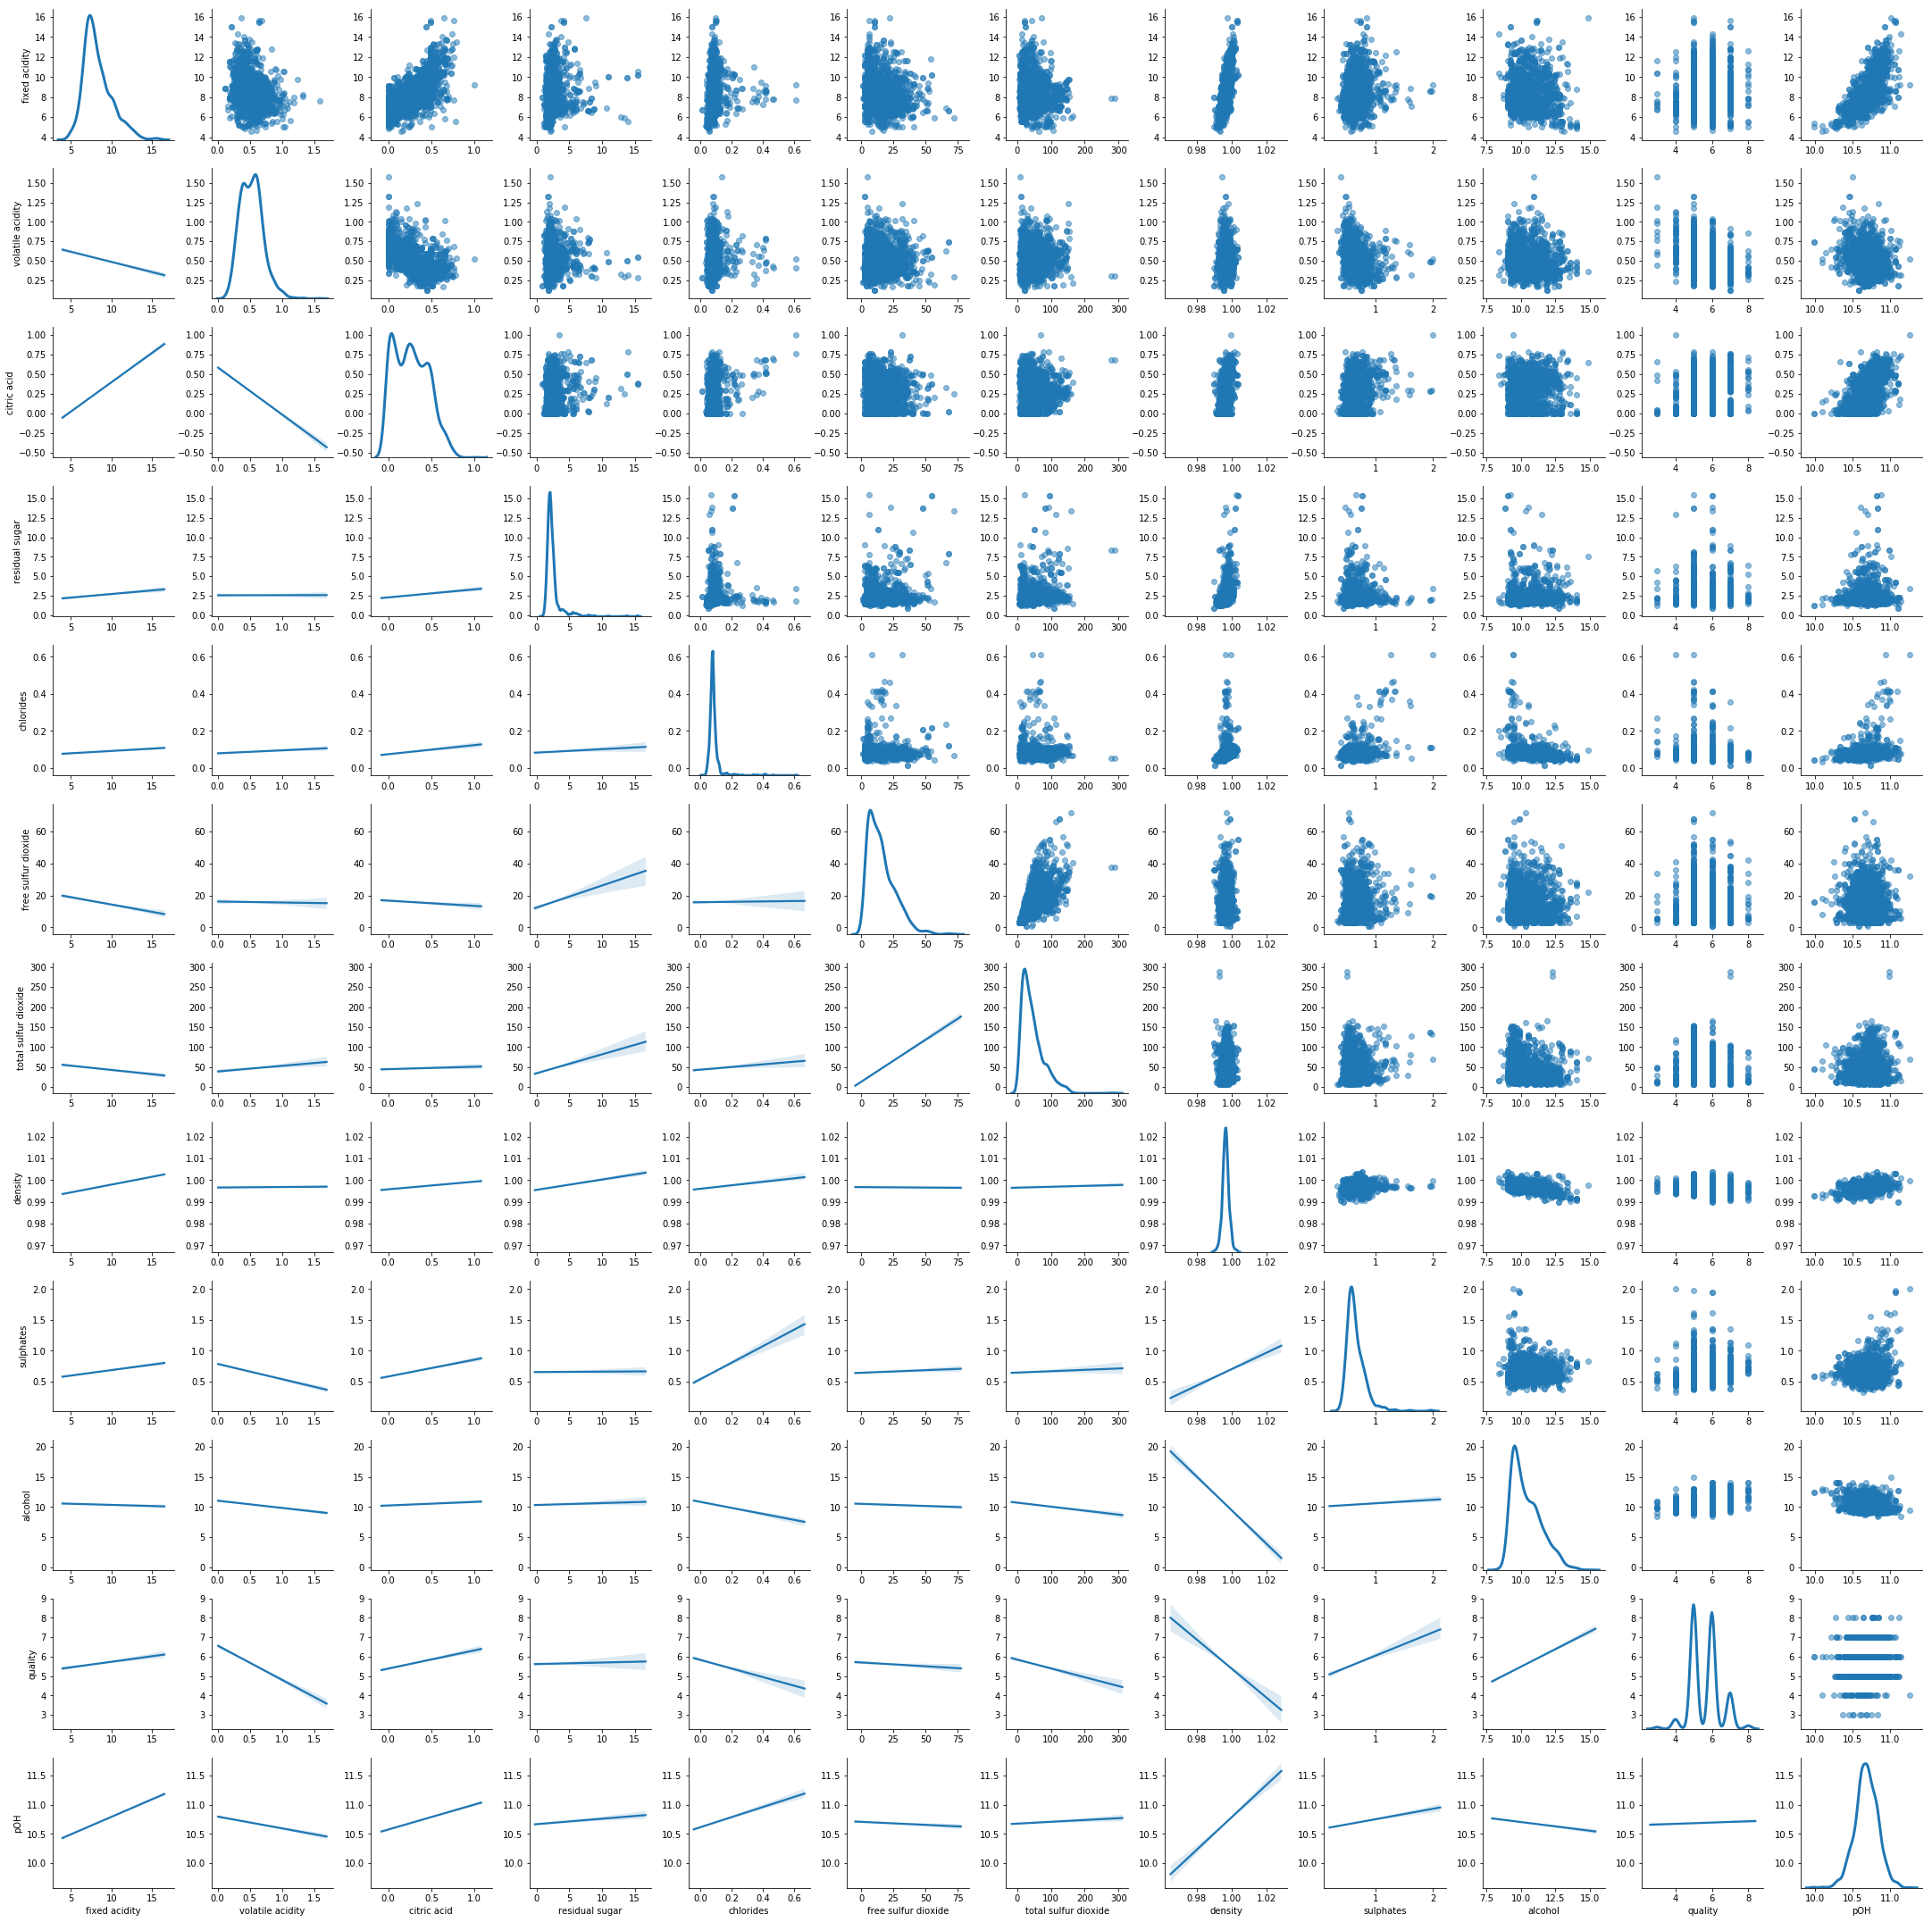

In [8]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(winlistDF, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   
pOH                        0.682978         -0.234937     0.541904   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

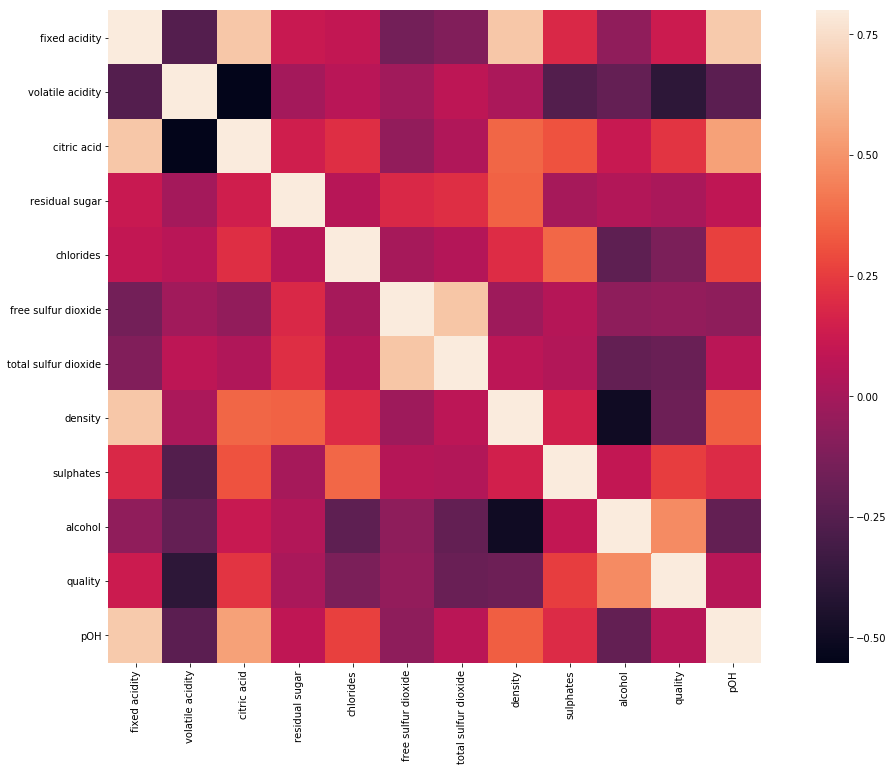

In [9]:
# Make the correlation matrix.
corrmat = winlistDF.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(20, 12))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [10]:

print(winlistDF.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

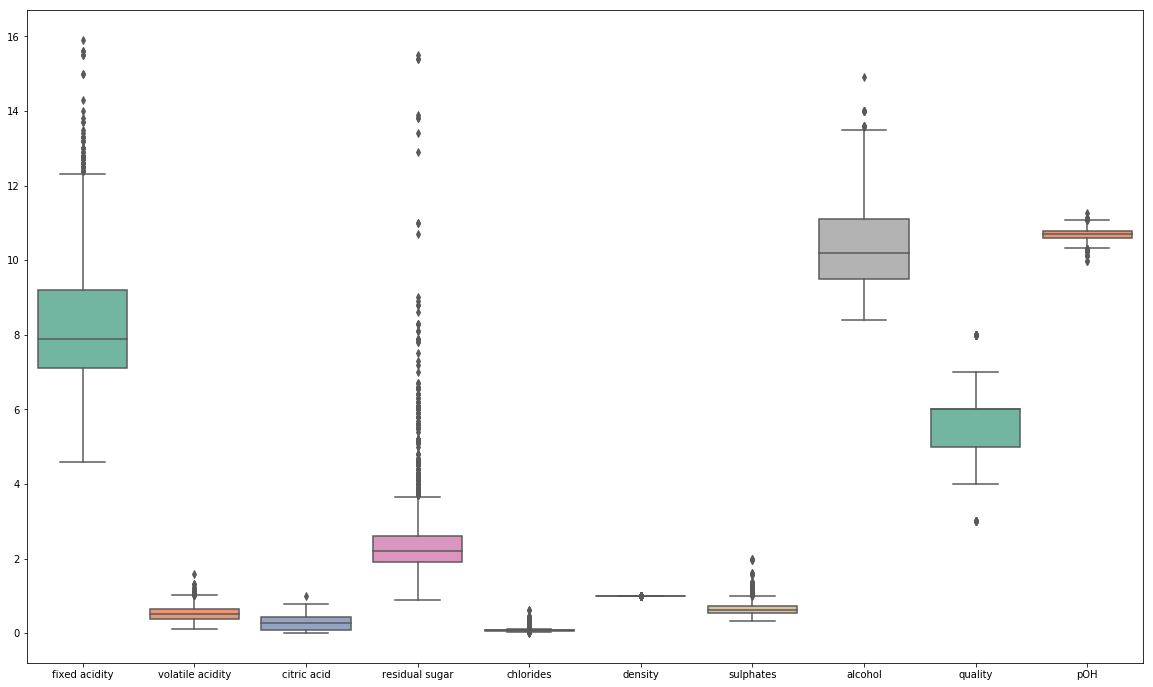

In [11]:
winlistdroped = winlistDF.drop(labels=["free sulfur dioxide", "total sulfur dioxide"], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
ax = sns.boxplot(data=winlistdroped, orient="v", palette="Set2")

In [12]:
winlistDFdrop = winlistDF.drop(labels=["free sulfur dioxide", "citric acid", "density", "fixed acidity"], axis=1)
# Make the correlation matrix.
corrmat = winlistDFdrop.corr()
print(corrmat)

                      volatile acidity  residual sugar  chlorides  \
volatile acidity              1.000000        0.001918   0.061298   
residual sugar                0.001918        1.000000   0.055610   
chlorides                     0.061298        0.055610   1.000000   
total sulfur dioxide          0.076470        0.203028   0.047400   
sulphates                    -0.260987        0.005527   0.371260   
alcohol                      -0.202288        0.042075  -0.221141   
quality                      -0.390558        0.013732  -0.128907   
pOH                          -0.234937        0.085652   0.265026   

                      total sulfur dioxide  sulphates   alcohol   quality  \
volatile acidity                  0.076470  -0.260987 -0.202288 -0.390558   
residual sugar                    0.203028   0.005527  0.042075  0.013732   
chlorides                         0.047400   0.371260 -0.221141 -0.128907   
total sulfur dioxide              1.000000   0.042947 -0.205654 -0.185

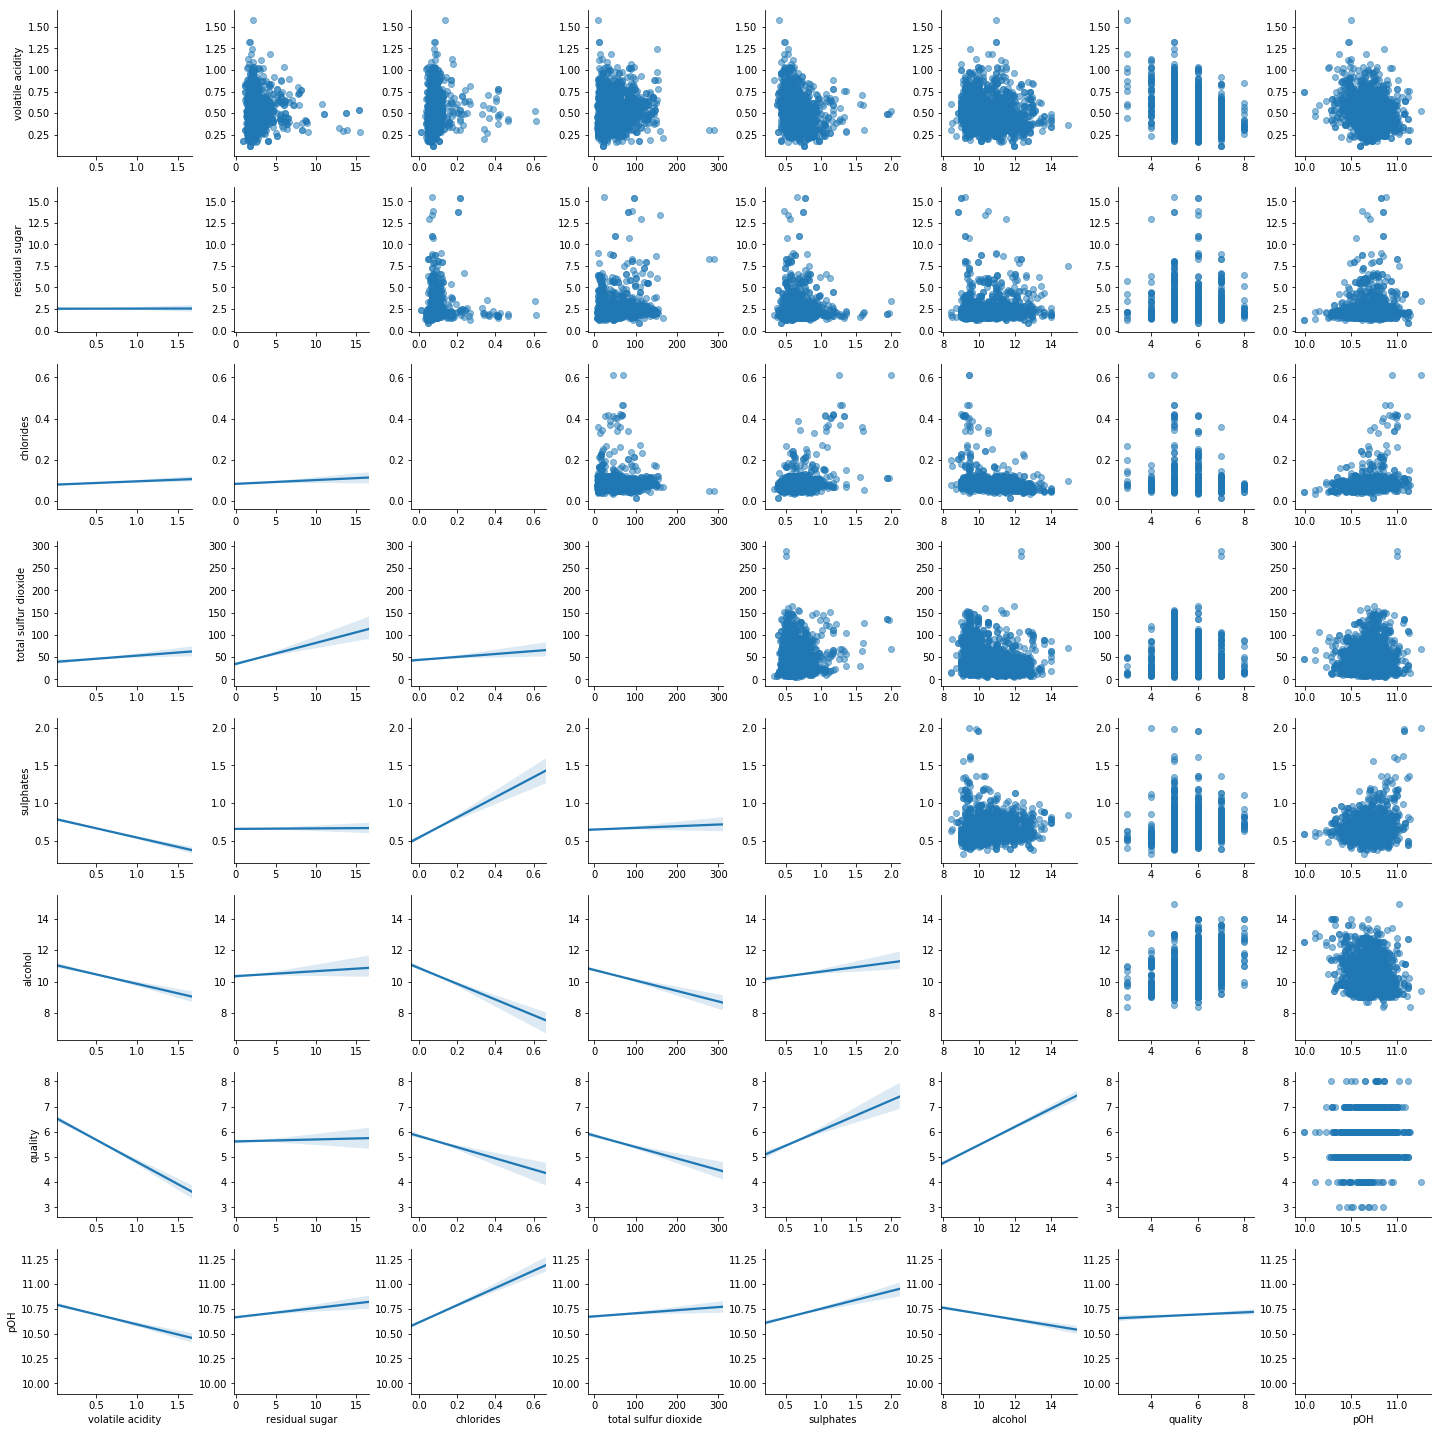

In [13]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(winlistDFdrop, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

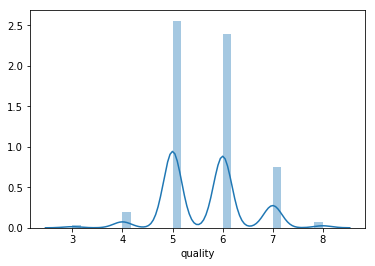

In [14]:
sns.distplot(winlistDFdrop["quality"])

In [15]:
features = pd.DataFrame()
#meanwinlistDF = winlistDF.drop(labels=["citric acid", "fixed acidity", "density", "free sulfur dioxide", "total sulfur dioxide"], axis=1)
Winmeans = winlistDF[["citric acid", "fixed acidity", "density", 'pOH']].mean(axis=0)
Winstds = winlistDF[["citric acid", "fixed acidity", "density", 'pOH']].std(axis=0)
features['combChem'] = (winlistDF[["citric acid", "fixed acidity", "density", 'pOH']]).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = winlistDF.loc[:, ["citric acid", "fixed acidity", "density", 'pOH']]
plotdf['combChem'] = features['combChem'] 

corrmat2 = plotdf.corr()

print(corrmat2)

               citric acid  fixed acidity   density       pOH  combChem
citric acid       1.000000       0.671703  0.364947  0.541904  0.728577
fixed acidity     0.671703       1.000000  0.668047  0.682978  0.995129
density           0.364947       0.668047  1.000000  0.341699  0.648215
pOH               0.541904       0.682978  0.341699  1.000000  0.729116
combChem          0.728577       0.995129  0.648215  0.729116  1.000000


In [16]:
#meanwinlistDF = winlistDF.drop(labels=["citric acid", "fixed acidity", "density", "free sulfur dioxide", "total sulfur dioxide"], axis=1)
Winmeans = winlistDF[["free sulfur dioxide", "total sulfur dioxide"]].mean(axis=0)
Winstds = winlistDF[["free sulfur dioxide", "total sulfur dioxide"]].std(axis=0)
features['sulfurcomb'] = (winlistDF[["free sulfur dioxide", "total sulfur dioxide"]]).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = winlistDF.loc[:, ["free sulfur dioxide", "total sulfur dioxide"]]
plotdf['sulfurcomb'] = features['sulfurcomb'] 

corrmat2 = plotdf.corr()

print(corrmat2)

                      free sulfur dioxide  total sulfur dioxide  sulfurcomb
free sulfur dioxide              1.000000              0.667666    0.797966
total sulfur dioxide             0.667666              1.000000    0.981463
sulfurcomb                       0.797966              0.981463    1.000000


                  volatile acidity  residual sugar  chlorides  sulphates  \
volatile acidity          1.000000        0.001918   0.061298  -0.260987   
residual sugar            0.001918        1.000000   0.055610   0.005527   
chlorides                 0.061298        0.055610   1.000000   0.371260   
sulphates                -0.260987        0.005527   0.371260   1.000000   
alcohol                  -0.202288        0.042075  -0.221141   0.093595   
quality                  -0.390558        0.013732  -0.128907   0.251397   
combChem                 -0.296633        0.121559   0.122791   0.206303   
sulfurcomb                0.059205        0.212521   0.039807   0.048067   

                   alcohol   quality  combChem  sulfurcomb  
volatile acidity -0.202288 -0.390558 -0.296633    0.059205  
residual sugar    0.042075  0.013732  0.121559    0.212521  
chlorides        -0.221141 -0.128907  0.122791    0.039807  
sulphates         0.093595  0.251397  0.206303    0.048067  
alcohol   

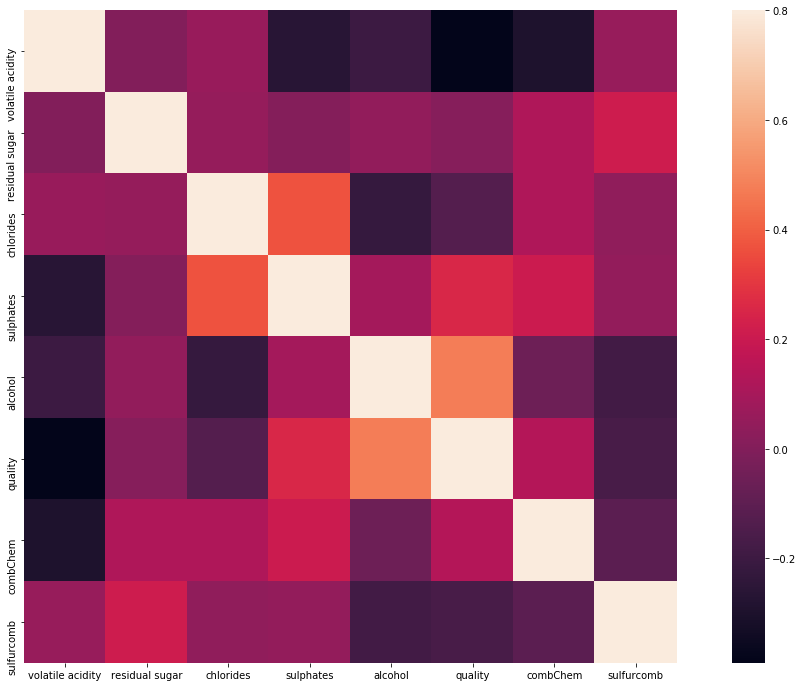

In [17]:
winlistDF2 = winlistDF.loc[:, ['volatile acidity', 'residual sugar', 'chlorides', 'sulphates', 'alcohol', 'quality']]
winlistDF2['combChem'] = features['combChem']
winlistDF2['sulfurcomb'] = features['sulfurcomb']

corrmat2 = winlistDF2.corr()
print(corrmat2)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(20, 12))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat2, vmax=.8, square=True)
plt.show()

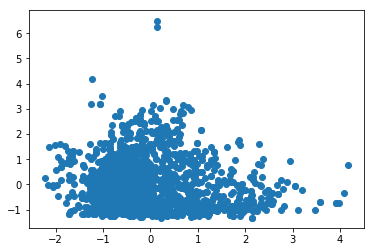

       volatile acidity  residual sugar     chlorides     sulphates  \
count      1.599000e+03    1.599000e+03  1.599000e+03  1.599000e+03   
mean       1.699704e-16   -1.905223e-16  4.838739e-16  7.639596e-16   
std        1.000313e+00    1.000313e+00  1.000313e+00  1.000313e+00   
min       -2.278280e+00   -1.162696e+00 -1.603945e+00 -1.936507e+00   
25%       -7.699311e-01   -4.532184e-01 -3.712290e-01 -6.382196e-01   
50%       -4.368911e-02   -2.403750e-01 -1.799455e-01 -2.251281e-01   
75%        6.266881e-01    4.341614e-02  5.384542e-02  4.240158e-01   
max        5.877976e+00    9.195681e+00  1.112703e+01  7.918677e+00   

            alcohol       quality      combChem    sulfurcomb  
count  1.599000e+03  1.599000e+03  1.599000e+03  1.599000e+03  
mean   9.437243e-16 -8.051373e-16 -4.740840e-16  7.883608e-17  
std    1.000313e+00  1.000313e+00  1.000313e+00  1.000313e+00  
min   -1.898919e+00 -3.265165e+00 -2.230126e+00 -1.313223e+00  
25%   -8.663789e-01 -7.878226e-01 -7.242

In [18]:
names = winlistDF2.columns
winlistDF2 = pd.DataFrame(preprocessing.scale(winlistDF2), columns=names)

# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(winlistDF2['combChem'], winlistDF2['sulfurcomb'])
plt.show()

# Lookit all those matching means and standard deviations!
print(winlistDF2.describe())

In [19]:
winlistDF2.head(2)

,volatile acidity,residual sugar,chlorides,sulphates,alcohol,quality,combChem,sulfurcomb
0,0.961877,-0.453218,-0.243707,-0.579207,-0.960246,-0.787823,-0.698515,-0.426953
1,1.967442,0.043416,0.223875,0.128950,-0.584777,-0.787823,-0.341824,0.730121


In [22]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
print(winlistDF2.describe())
X = StandardScaler().fit_transform(winlistDF2)
X = pd.DataFrame(X)


# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)


       volatile acidity  residual sugar     chlorides     sulphates  \
count      1.599000e+03    1.599000e+03  1.599000e+03  1.599000e+03   
mean       1.699704e-16   -1.905223e-16  4.838739e-16  7.639596e-16   
std        1.000313e+00    1.000313e+00  1.000313e+00  1.000313e+00   
min       -2.278280e+00   -1.162696e+00 -1.603945e+00 -1.936507e+00   
25%       -7.699311e-01   -4.532184e-01 -3.712290e-01 -6.382196e-01   
50%       -4.368911e-02   -2.403750e-01 -1.799455e-01 -2.251281e-01   
75%        6.266881e-01    4.341614e-02  5.384542e-02  4.240158e-01   
max        5.877976e+00    9.195681e+00  1.112703e+01  7.918677e+00   

            alcohol       quality      combChem    sulfurcomb  
count  1.599000e+03  1.599000e+03  1.599000e+03  1.599000e+03  
mean   9.437243e-16 -8.051373e-16 -4.740840e-16  7.883608e-17  
std    1.000313e+00  1.000313e+00  1.000313e+00  1.000313e+00  
min   -1.898919e+00 -3.265165e+00 -2.230126e+00 -1.313223e+00  
25%   -8.663789e-01 -7.878226e-01 -7.242

In [ ]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 8).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

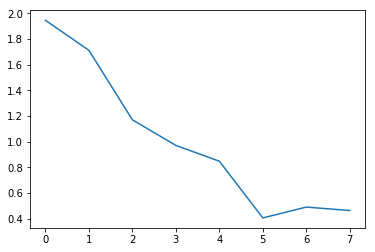

In [170]:
plt.plot(eig_val_cov)
plt.show()

In [176]:
P = eig_vec_cov[:,0]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
data_to_plot = df_pca[['tvtot', 'ppltrst', 'pplfair', 'pplhlp']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

NameError: name 'df_pca' is not defined

Exploring the data: Univariate
After defining the research question, your next step toward building a model is to get to know the individual variables through inspection of the data file itself, visualizations and univariate descriptive statistics ("univariate" means pertaining to one variable, rather than many). You’ll want to answer questions such as:

How many variables do I have?
How many datapoints?
Which variables are continuous (having an infinite number of possible values, such as age) and which are categorical (having a limited number of values, such as gender).
Do any of my variables have a known probability distribution (normal, Poisson, Gamma, etc)?
Do I have missing data? If so, how much?
How much variance is there in each of my variables? If you’ve cleaned this dataset yourself, you’ll probably already know the answers to most of these questions.